### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment: Predicting future outcomes

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

## Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
print(reviews.head())
print(reviews.info())
reviews.describe()

   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  A

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


All columns have 2000 non-null values, i.e. no missing values found

In [3]:
# Drop unnecessary columns.
reviews.drop(['language', 'platform'], axis=1, inplace=True)
print(reviews.head())

   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education  product                                             review  \
0  graduate      453  When it comes to a DM's screen, the space on t...   
1  graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  graduate      254  Nice art, nice printing.  Why two panels are f...   
3  graduate      263  Amazing buy! Bought it as a gift for our new d...   
4  graduate      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this sp

In [4]:
# Rename the column headers.
reviews.rename(columns = {'remuneration (k£)':'remuneration', 
                          'spending_score (1-100)':'spending_score'}, inplace = True)

# View column names.
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


In [5]:
# Create a CSV file as output.
reviews.to_csv('turtle_reviews_clean.csv', index=False)

In [6]:
# Import new CSV file with Pandas.
reviews_c = pd.read_csv('turtle_reviews_clean.csv')

# View the DataFrame.
print(reviews_c.head())
print(reviews_c.info())
reviews_c.describe()


   gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  

,age,remuneration,spending_score,loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## Linear Regression

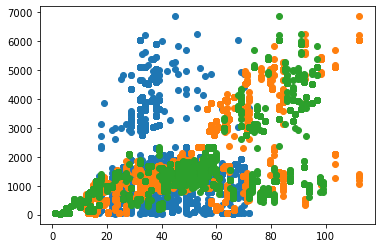

In [7]:
# Independent variable.
x_a = reviews_c['age']
x_r = reviews_c['remuneration']
x_ss = reviews_c['spending_score']

# Dependent variable.
y_lp = reviews_c['loyalty_points']

# Check for linearity with Matplotlib.
plt.scatter(x_a, y_lp)
plt.scatter(x_r, y_lp)
plt.scatter(x_ss, y_lp)



### Remuneration vs Loyalty Point

In [8]:
# OLS model and summary.
f = 'y_lp ~ x_r'
test = ols(f, data = reviews_c).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   y_lp   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        15:07:12   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x_r           34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared=0.38
P>|t|=0, i.e. the estimated slope (x_r coefficient) is significant
p-value = 2.43e-209 < 0.05, i.e. significant


In [9]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -65.686513
x_r          34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x_r           0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [10]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-65.686513) + 34.187825 * reviews['remuneration']

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

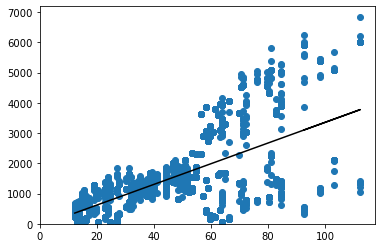

In [11]:
# Plot the graph with a regression line.
plt.scatter(x_r, y_lp)
plt.plot(x_r, y_pred, color='black')

plt.xlim(0)
plt.ylim(0)

plt.show()

### Spending vs Loyalty Points

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   y_lp   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        15:07:12   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x_ss          33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

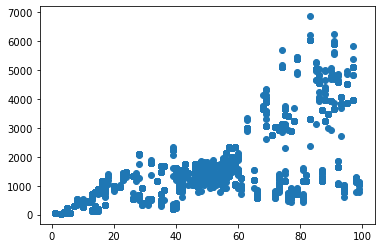

In [12]:
# Independent variable.
x_ss = reviews_c['spending_score']

# Dependent variable.
y_lp = reviews_c['loyalty_points']

# Check for linearity with Matplotlib.
plt.scatter(x_ss, y_lp)


# OLS model and summary.
f = 'y_lp ~ x_ss'
test_ss = ols(f, data = reviews_c).fit()
test_ss.summary()

In [13]:
# Extract the estimated parameters.
print("Parameters: ", test_ss.params) 

# Extract the standard errors.
print("Standard errors: ", test_ss.bse)  

# Extract the predicted values.
print("Predicted values: ", test_ss.predict()) 

Parameters:  Intercept   -75.052663
x_ss         33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x_ss          0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [14]:
# Set the X coefficient and the constant to generate the regression table.
y_pred_ss = (-75.052663) + 33.061693 * reviews['spending_score']

# View the output.
y_pred_ss

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

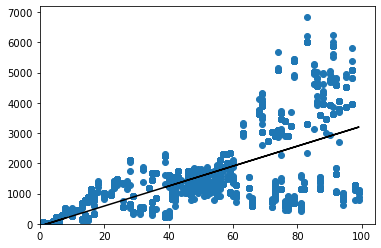

In [15]:
# Plot graph with regression line.
plt.scatter(x_ss, y_lp)
plt.plot(x_ss, y_pred_ss, color='black')

plt.xlim(0)
plt.ylim(0)

plt.show()

Age vs Loyalty Points

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   y_lp   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 23 Dec 2022   Prob (F-statistic):             0.0577
Time:                        15:07:13   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x_a           -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

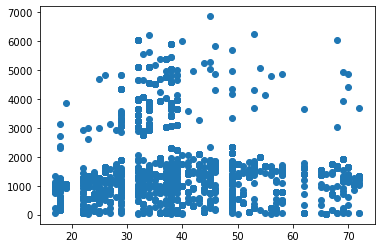

In [16]:
# Independent variable.
x_a = reviews_c['age']

# Dependent variable.
y_lp = reviews_c['loyalty_points']

# Check for linearity with Matplotlib.
plt.scatter(x_a, y_lp)


# OLS model and summary.
f = 'y_lp ~ x_a'
test_a = ols(f, data = reviews_c).fit()
test_a.summary()

No clear linearity is shown there linear regression is not perfromed here.
To further look into relationship between age and loyalty, we may consider multiple regression or clustering method.

## Observations and insights

Remuneration and Spending Score show a positive correlation with loyalty points, while there is no clear linear relationship found with age. To improve the regression model for better prediction, we can consider adding in more variables and breakdown the data into smaller groups using clustering method, espeically for age vs loyalty where data seems to be split in to groups in scatter graph.

# 

## Usefulness of Remuneration and Spending data

In [17]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [18]:
# Load the CSV file(s) as r_ss.
r_ss = pd.read_csv('turtle_reviews_clean.csv')

# View the DataFrame.
print(r_ss.head())
print(r_ss.info())
r_ss.describe()



   gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  

,age,remuneration,spending_score,loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [19]:
# Drop unnecessary columns.
r_ss.drop(['gender', 'age', 'loyalty_points',
          'product', 'review', 'summary','education'], axis=1, inplace=True)

# View DataFrame.
print(r_ss.info())
r_ss.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None


,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [20]:
# Check again for missing value.
r_ss.isnull().sum()

remuneration      0
spending_score    0
dtype: int64

In [21]:
# Descriptive statistics.
r_ss.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

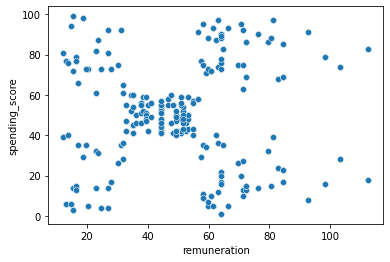

In [22]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=r_ss)

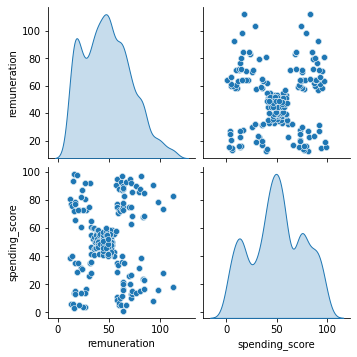

In [23]:
# Create a pairplot with Seaborn.
x = r_ss[['remuneration', 'spending_score']]

sns.pairplot(r_ss,
             vars=x,
             diag_kind= 'kde')

## 3. Elbow and silhoutte methods

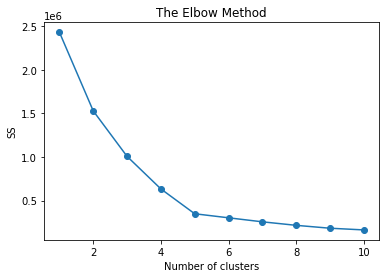

In [24]:
# Determine the number of clusters: Elbow method.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

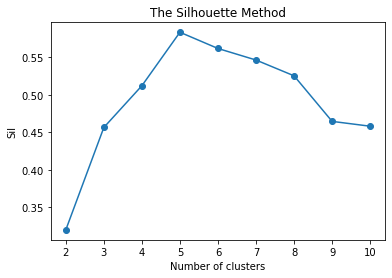

In [25]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## Evaluate k-means model at different values of *k*

In [26]:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

x['K-Means Predicted'].value_counts()


0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

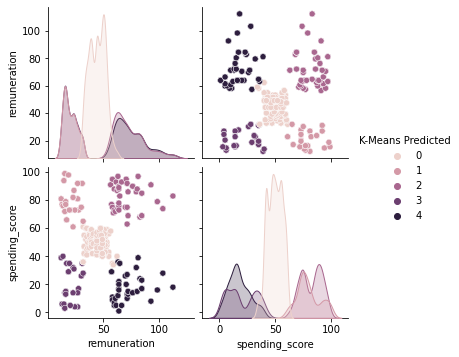

In [27]:
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [28]:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

x['K-Means Predicted'].value_counts()

1    1013
2     356
0     351
3     280
Name: K-Means Predicted, dtype: int64

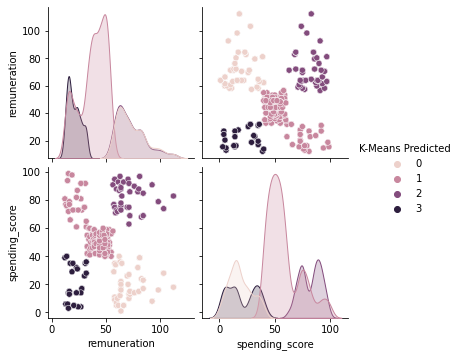

In [29]:
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [30]:
kmeans = KMeans(n_clusters = 6,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

x['K-Means Predicted'].value_counts()

1    767
2    356
3    271
4    269
5    214
0    123
Name: K-Means Predicted, dtype: int64

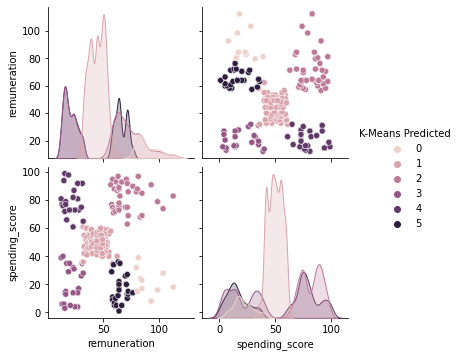

In [31]:
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

## Fit final model

In [32]:
# Apply the final model.
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

In [33]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  1
2         13.12               6                  3
3         13.12              77                  1
4         13.94              40                  3


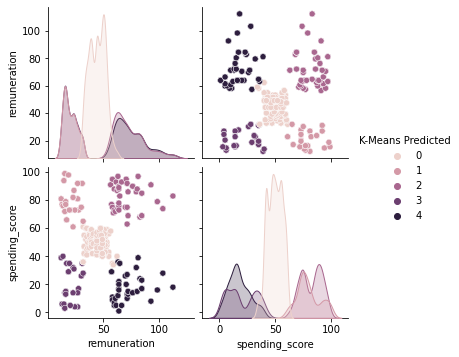

In [34]:
# Visualising the clusters.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

# View the DataFrame.
print(x.head())

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

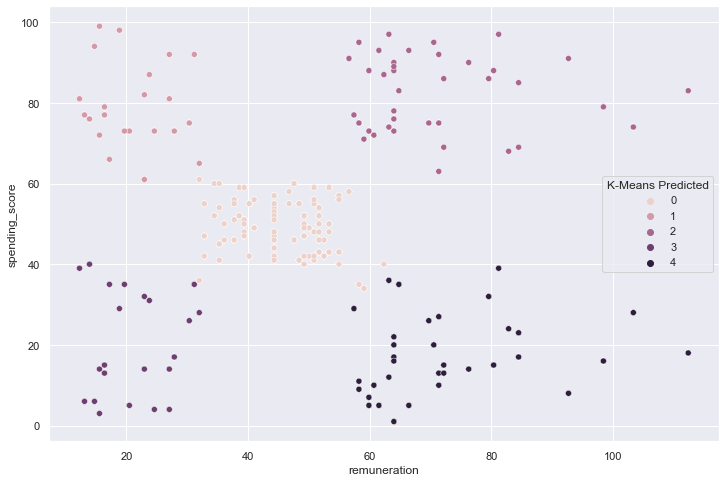

In [35]:
# Visualising the clusters.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted')


Result indicates that there are 5 groups of customers with different spending habit that we should keep in mind in future analysis. The 5 groups can be considered as 
    1. High income and high spending score
    2. High income but low spending score
    3. Low income and low spending score
    4. Low income but high spedning score
    5. Mutual Group

# 

In [36]:
#!pip install textblob

In [37]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /Users/tt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/tt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
# Load the data set as r_rs.
r_rs = pd.read_csv('turtle_reviews_clean.csv')

# View the DataFrame.
print(r_rs.head())




   gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  

Data is previously cleaned and explored.

In [40]:
# Keep necessary columns. Drop unnecessary columns.
r_rs.drop(['gender', 'age', 'loyalty_points',
          'product', 'remuneration', 'spending_score', 'education'], axis=1, inplace=True)

# View DataFrame.
r_rs.head()


,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [41]:
# Determine if there are any missing values.
print(r_rs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


## Prepare the data for NLP
### 1. Change to lower case and join the elements in each of the columns respectively (review and summary)

In [42]:
# Review: Change all to lower case and join with a space.
r_rs['review'] = r_rs['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
print(r_rs.head())

                                              review  \
0  when it comes to a dm's screen, the space on t...   
1  an open letter to galeforce9*: your unpainted ...   
2  nice art, nice printing. why two panels are fi...   
3  amazing buy! bought it as a gift for our new d...   
4  as my review of gf9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap  


In [43]:
# Summary: Change all to lower case and join with a space.
r_rs['summary'] = r_rs['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))
print(r_rs.head())

                                              review  \
0  when it comes to a dm's screen, the space on t...   
1  an open letter to galeforce9*: your unpainted ...   
2  nice art, nice printing. why two panels are fi...   
3  amazing buy! bought it as a gift for our new d...   
4  as my review of gf9's previous screens these w...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap  


### 2. Replace punctuation in each of the columns respectively (review and summary)

In [44]:
# Replace all the punctuations in review column.
r_rs['review'] = r_rs['review'].str.replace('[^\w\s]','')

# View output.
print(r_rs.head())

                                              review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap  


In [45]:
# Replace all the puncuations in summary column.
r_rs['summary'] = r_rs['summary'].str.replace('[^\w\s]','')

# View output.
print(r_rs.head())

                                              review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap  


### 3. Drop duplicates in both columns

In [46]:
r_rs.review.duplicated().sum()
r_rs.summary.duplicated().sum()

649

In [47]:
# Drop duplicates in both columns.
review = r_rs.drop_duplicates(subset=['review'])
review = r_rs.drop_duplicates(subset=['summary'])

# Preview data.
review.reset_index(inplace=True)
review.head()
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    1351 non-null   int64 
 1   review   1351 non-null   object
 2   summary  1351 non-null   object
dtypes: int64(1), object(2)
memory usage: 31.8+ KB


### 4. Tokenise and create wordclouds

In [48]:
# Create new DataFrame (copy DataFrame).
review_df = pd.DataFrame(review)

# View DataFrame.
review_df

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap
...,...,...,...
1346,1989,this is a fun card game for people who like wo...,this is a fun card game for people who like words
1347,1990,fun for the family just make certain you agree...,sort of a card game equivalent of scrabble and...
1348,1992,great game to keep the mind active we play it ...,great game to keep the mind active
1349,1994,we are retired and find this a great way to st...,a great mind game


In [49]:
# Apply tokenisation to both columns.
review_df['tokens_r'] = review_df['review'].apply(word_tokenize)
review_df['tokens_s'] = review_df['summary'].apply(word_tokenize)
# View DataFrame.
print(review_df.info())
print(review_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     1351 non-null   int64 
 1   review    1351 non-null   object
 2   summary   1351 non-null   object
 3   tokens_r  1351 non-null   object
 4   tokens_s  1351 non-null   object
dtypes: int64(1), object(4)
memory usage: 52.9+ KB
None
   index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pre

In [50]:
# Review: Create a word cloud.
# Create an empty string variable.
all_reviews = ''
for i in range(review_df.shape[0]):
    # Add each comment.
    all_reviews = all_reviews + review_df['review'][i]
      
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_r = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_reviews) 

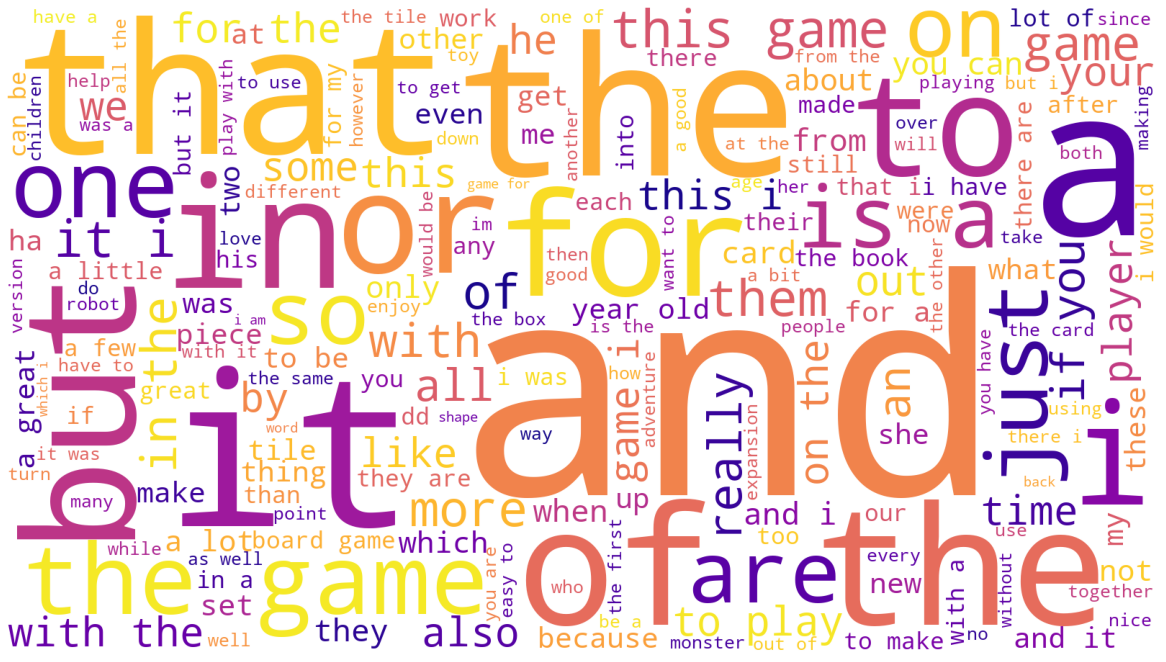

In [51]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_r) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [52]:
# Summary: Create a word cloud.
# Create an empty string variable.
all_summary = ''
for i in range(review_df.shape[0]):
    # Add each comment.
    all_summary = all_summary + review_df['summary'][i]
      
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_s = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summary) 

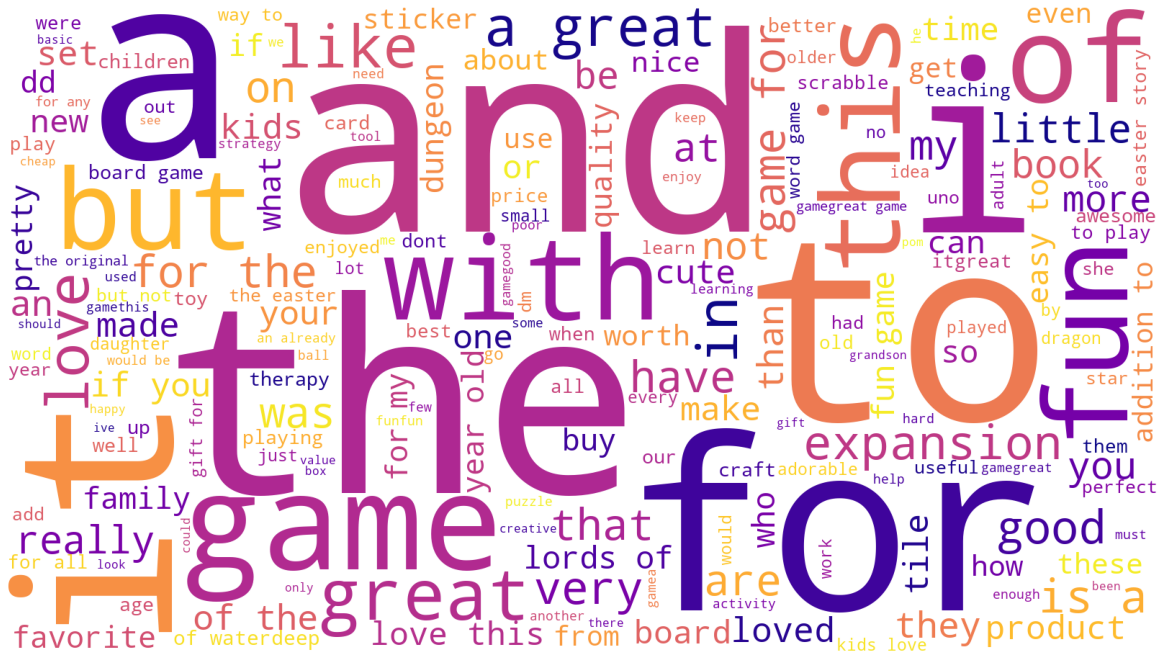

In [53]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_s) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4.1 Create frequency distribution

In [54]:
# Determine the frequency distribution.

all_tokens_r = []
for i in range(review_df.shape[0]):
    # Add each comment.
    all_tokens_r = all_tokens_r + review_df['tokens_r'][i]
    
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens_r)

# Preview data.
fdist
      

FreqDist({'the': 5021, 'and': 2934, 'to': 2843, 'a': 2830, 'of': 2262, 'i': 1888, 'it': 1830, 'is': 1594, 'this': 1551, 'for': 1361, ...})

In [55]:
# Determine the frequency distribution.

all_tokens_s = []
for i in range(review_df.shape[0]):
    # Add each comment.
    all_tokens_s = all_tokens_s + review_df['tokens_s'][i]
    
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens_s)

# Preview data.
fdist
      

FreqDist({'game': 268, 'the': 258, 'a': 238, 'great': 237, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

### 5. Remove alphanumeric characters and stopwords

In [56]:
# Delete all the alpanum.
tokens_r = [word for word in all_tokens_r if word.isalnum()]
tokens_s = [word for word in all_tokens_s if word.isalnum()]

In [57]:
# Remove all the stopwords
# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens_r2 = [x for x in tokens_r if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_r2_string = ''

for value in tokens_r:
    # Add each filtered token word to the string.
    tokens_r2_string = tokens_r2_string + value + ' '
    
    
# Create a filtered list of tokens without stop words.
tokens_s2 = [x for x in tokens_s if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_s2_string = ''

for value in tokens_s:
    # Add each filtered token word to the string.
    tokens_s2_string = tokens_s2_string + value + ' '

### 6. Create wordcloud without stopwords

In [58]:
# Create a wordcloud without stop words.
# Create a WordCloud.
wordcloud_r = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_r2_string) 



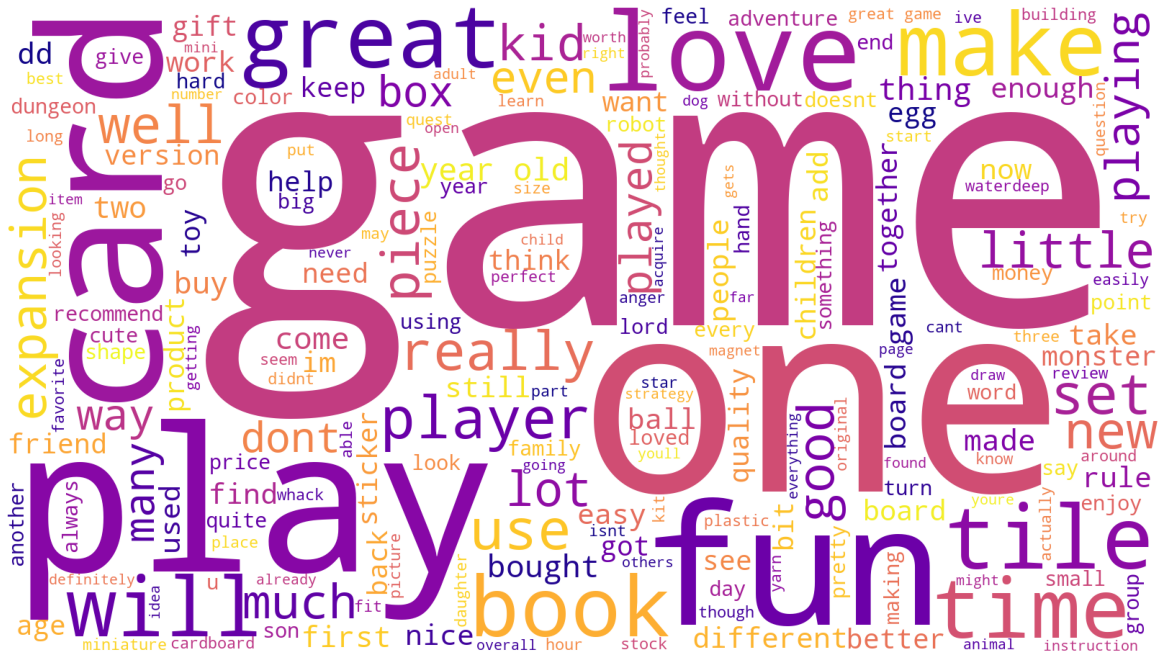

In [59]:
# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_r) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [60]:
# Create a wordcloud without stop words.
# Create a WordCloud.
wordcloud_s = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_s2_string) 

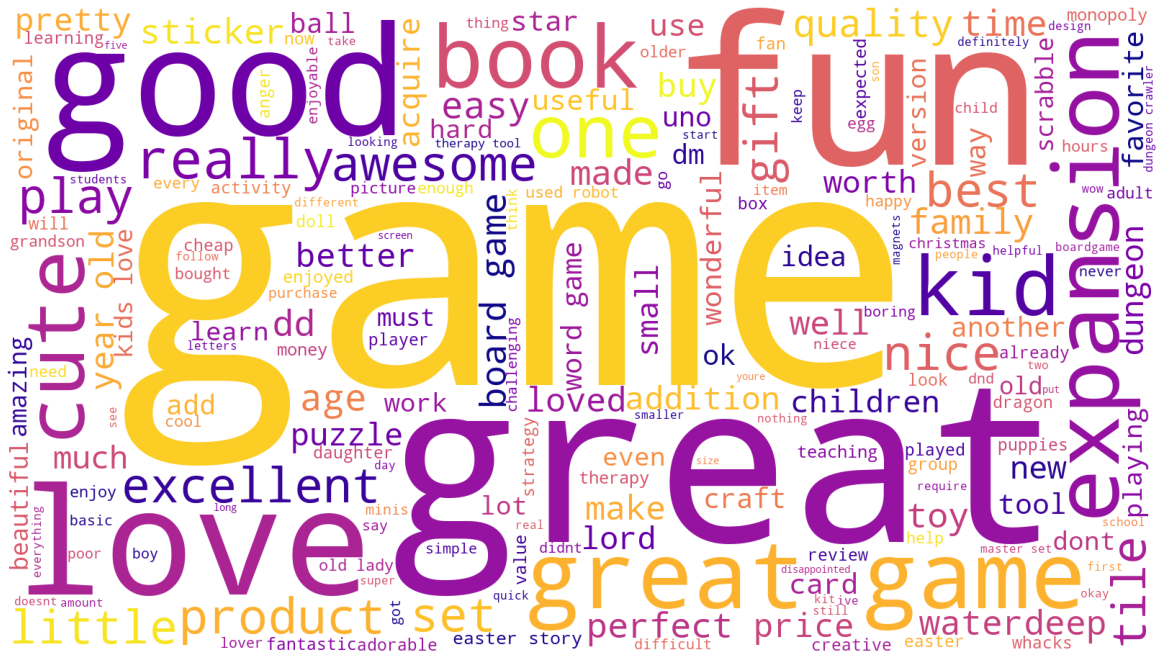

In [61]:
# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_s) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 7. Identify 15 most common words and polarity

In [62]:
# Determine the 15 most common words.
# View the frequency distribution.
fdist_r = FreqDist(tokens_r2)

# Preview the data.
fdist_r

FreqDist({'game': 1360, 'one': 475, 'play': 442, 'fun': 407, 'great': 392, 'like': 373, 'get': 293, 'cards': 281, 'tiles': 280, 'really': 278, ...})

In [63]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts_r = pd.DataFrame(Counter(tokens_r2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_r

,Frequency
Word,
game,1360
one,475
play,442
fun,407
great,392
like,373
get,293
cards,281
tiles,280


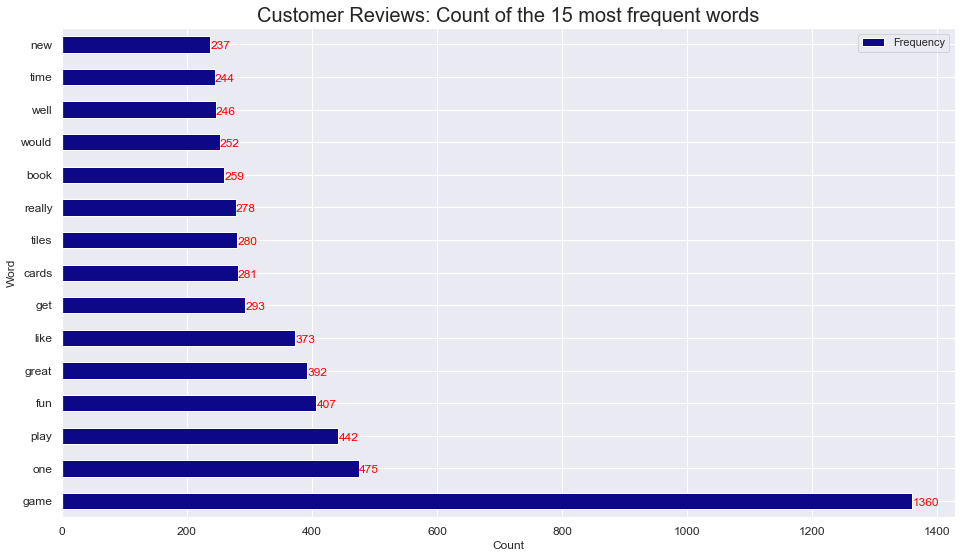

In [64]:
# Set the plot type.
ax_r = counts_r.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax_r.set_xlabel('Count', fontsize=12)
ax_r.set_ylabel('Word', fontsize=12)
ax_r.set_title("Customer Reviews: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax_r.patches:
    ax_r.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

In [65]:
# Determine the 15 most common words.
# View the frequency distribution.
fdist_s = FreqDist(tokens_s2)

# Preview the data.
fdist_s

FreqDist({'game': 268, 'great': 237, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

In [66]:
# Generate a DataFrame from Counter.
counts_s = pd.DataFrame(Counter(tokens_s2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_s

,Frequency
Word,
game,268
great,237
fun,175
good,84
love,70
like,54
kids,48
book,42
expansion,42


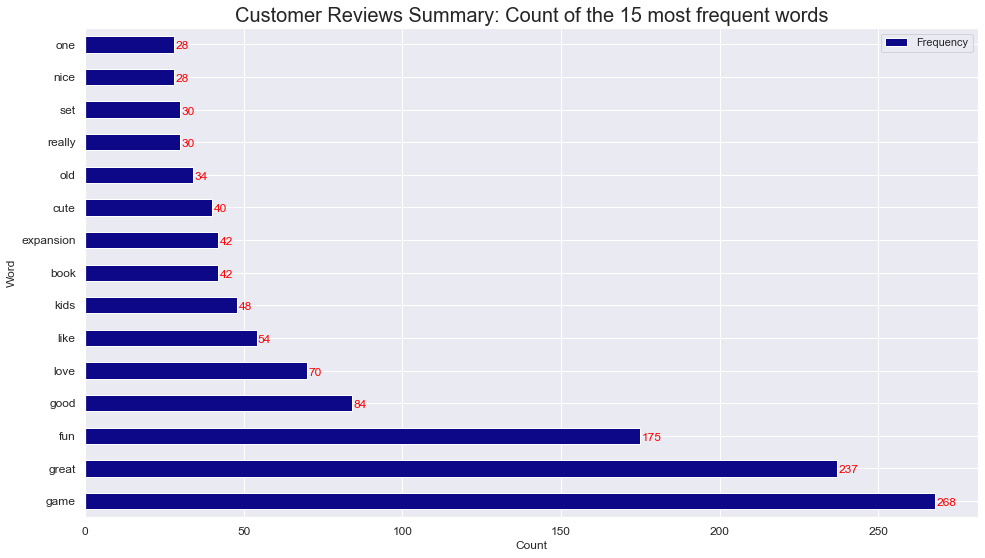

In [67]:
# Set the plot type.
ax_s = counts_s.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax_s.set_xlabel('Count', fontsize=12)
ax_s.set_ylabel('Word', fontsize=12)
ax_s.set_title("Customer Reviews Summary: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax_s.patches:
    ax_s.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

### 7.1 Review polarity and sentiment: Plot histograms of polarity and sentiment scores for the respective columns.

In [68]:
# Determine polarity of both columns. 
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
review_df['polarity_reviews'] = review_df['review'].apply(generate_polarity)
review_df['polarity_summary'] = review_df['summary'].apply(generate_polarity)

In [69]:
# View output.
review_df['polarity_reviews'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity_reviews, dtype: float64

In [70]:
review_df['polarity_summary'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity_summary, dtype: float64

In [71]:
# Determine subjectivity of both columns. 
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with sentiment scores for each comment.
review_df['subjectivity_reviews'] = review_df['review'].apply(generate_subjectivity)
review_df['subjectivity_summary'] = review_df['summary'].apply(generate_subjectivity)


In [72]:
# View output.
review_df['subjectivity_reviews'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity_reviews, dtype: float64

In [73]:
# View output.
review_df['subjectivity_summary'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: subjectivity_summary, dtype: float64

Text(0.5, 1.0, 'Histogram of sentiment score - Reviews')

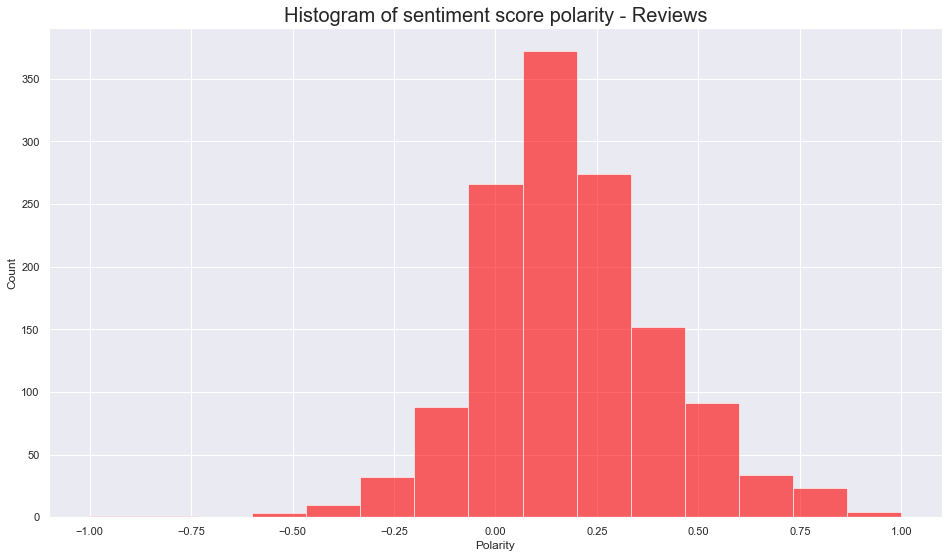

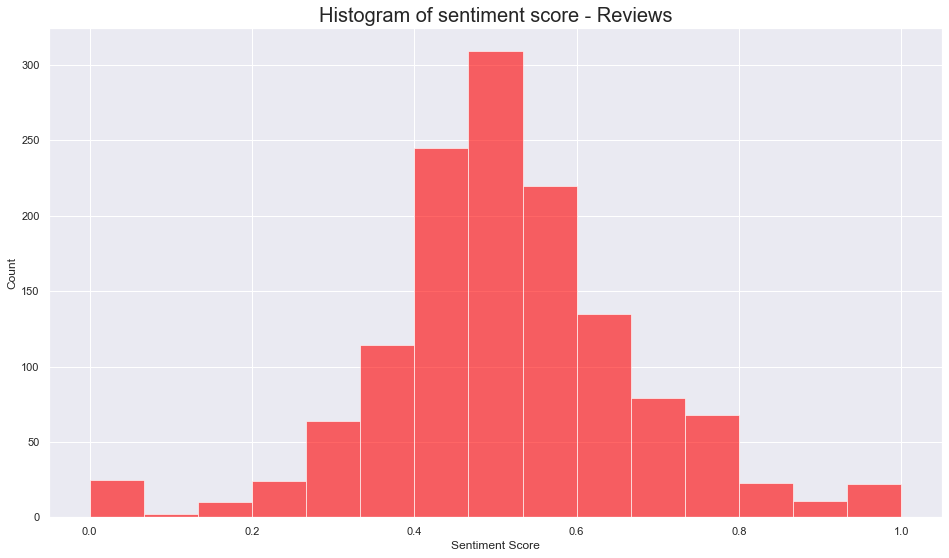

In [74]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(review_df['polarity_reviews'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity - Reviews', fontsize=20)

# Histogram of sentiment score
# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(review_df['subjectivity_reviews'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score - Reviews', fontsize=20)

Text(0.5, 1.0, 'Histogram of sentiment score - Summary')

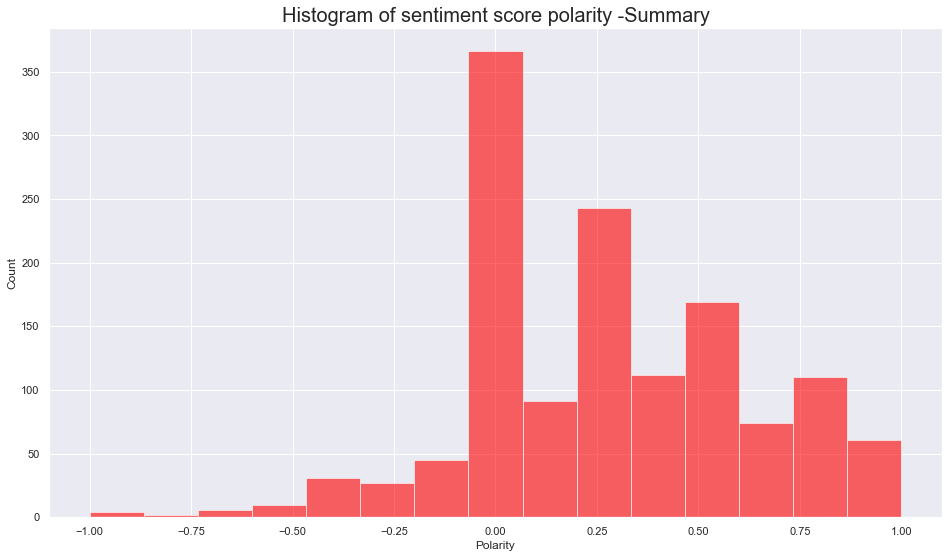

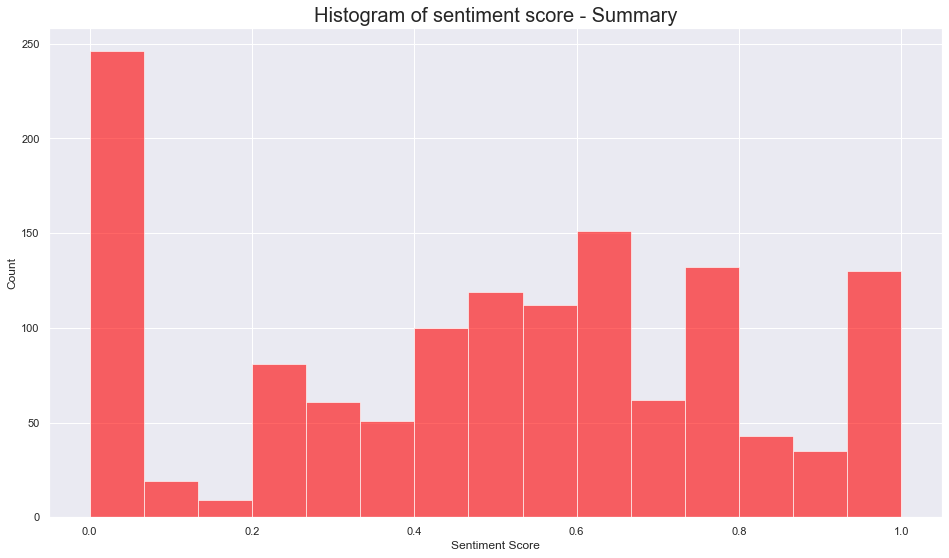

In [75]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(review_df['polarity_summary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity -Summary', fontsize=20)

# Histogram of sentiment score
# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(review_df['subjectivity_summary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score - Summary', fontsize=20)


### 8. Identify top 20 positive and negative reviews and summaries respectively

In [76]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_sentiment_r = review_df.nsmallest(20, 'polarity_reviews')

# Eliminate unnecessary columns.
negative_sentiment_r = negative_sentiment_r[['review', 'polarity_reviews', 'subjectivity_reviews']]

# Adjust the column width.
negative_sentiment_r.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.



,review,polarity_reviews,subjectivity_reviews
165,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000,1.000000
147,incomplete kit very disappointing,-0.780000,0.910000
267,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,-0.550000,0.300000
90,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,-0.500000,0.900000
141,i sent this product to my granddaughter the pompom maker comes in two parts and is supposed to snap together to create the pompoms however both parts were the same making it unusable if you cant make the pompoms the kit is useless since this was sent as a gift i do not have it to return very disappointed,-0.491667,0.433333
251,my 8 yearold granddaughter and i were very frustrated and discouraged attempting this craft it is definitely not for a young child i too had difficulty understanding the directions we were very disappointed,-0.446250,0.533750
382,i purchased this on the recommendation of two therapists working with my adopted children the children found it boring and put it down half way through,-0.440741,0.485185
312,this game although it appears to be like uno and have an easier play method it was still too time consuming and wordy for my children with learning disabilities,-0.400000,0.400000
355,my son loves playing this game it was recommended by a counselor at school that works with him,-0.400000,0.400000
714,if you like me used to play dd but now you and your friends growed up and cant be together because all the responsibilities and bla bla bla this game is for you come to the dungeon,-0.400000,0.400000


In [77]:
# Top 20 negative summaries.
# Create a DataFrame.
negative_sentiment_s = review_df.nsmallest(20, 'polarity_summary')

# Eliminate unnecessary columns.
negative_sentiment_s = negative_sentiment_s[['summary', 'polarity_summary', 'subjectivity_summary']]

# Adjust the column width.
negative_sentiment_s.style.set_properties(subset=['summary'], **{'width': '1200px'})

# View output.


,summary,polarity_summary,subjectivity_summary
17,the worst value ive ever seen,-1.000000,1.000000
165,boring unless you are a craft person which i am,-1.000000,1.000000
588,boring,-1.000000,1.000000
838,before this i hated running any rpg campaign dealing with towns because it,-0.900000,0.700000
1,another worthless dungeon masters screen from galeforce9,-0.800000,0.900000
116,disappointed,-0.750000,0.750000
266,promotes anger instead of teaching calming methods,-0.700000,0.200000
635,too bad this is not what i was expecting,-0.700000,0.666667
638,bad qualityall made of paper,-0.700000,0.666667
144,at age 31 i found these very difficult to make,-0.650000,1.000000


In [78]:
# Top 20 positive reviews.
# Create a DataFrame.
positive_sentiment_r = review_df.nlargest(20, 'polarity_reviews')

# Eliminate unnecessary columns.
positive_sentiment_r = positive_sentiment_r[['review', 'polarity_reviews', 'subjectivity_reviews']]

# Adjust the column width.
positive_sentiment_r.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.


,review,polarity_reviews,subjectivity_reviews
564,perfect,1.000000,1.000000
1082,my daughter loves her stickers awesome seller thank you,1.000000,1.000000
1336,perfect for tutoring my grandson in spelling,1.000000,1.000000
891,the best part i see is the box what a wonderfully diverse and rounded set for the cost i am so happy and as the dm you know that if i am happy my players are happy,0.880000,0.860000
498,great quality very cute and perfect for my toddler,0.816667,0.916667
31,the pictures are great ive done one and gave it to a friend of mine who likes dragons,0.800000,0.750000
336,great seller happy with my purchase 5 starrrr,0.800000,0.875000
439,great easter gift for kids,0.800000,0.750000
491,these are great,0.800000,0.750000
575,great,0.800000,0.750000


In [79]:
# Top 20 positive summaries.

# Create a DataFrame.
positive_sentiment_s = review_df.nlargest(20, 'polarity_summary')

# Eliminate unnecessary columns.
positive_sentiment_s = positive_sentiment_s[['summary', 'polarity_summary', 'subjectivity_summary']]

# Adjust the column width.
positive_sentiment_s.style.set_properties(subset=['summary'], **{'width': '1200px'})

# View output.


,summary,polarity_summary,subjectivity_summary
5,best gm screen ever,1.000000,0.300000
23,wonderful designs,1.000000,1.000000
27,perfect,1.000000,1.000000
61,theyre the perfect size to keep in the car or a diaper,1.000000,1.000000
107,perfect for preschooler,1.000000,1.000000
112,awesome sticker activity for the price,1.000000,1.000000
132,awesome book,1.000000,1.000000
133,he was very happy with his gift,1.000000,1.000000
150,awesome,1.000000,1.000000
166,awesome and welldesigned for 9 year olds,1.000000,1.000000


# 